In [2]:
import pandas as pd

df = pd.read_csv('c:/data/Data/ozone/ozone3.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Ozone2
0,41.0,190.0,7.4,67,5,1,41.00000
1,36.0,118.0,8.0,72,5,2,36.00000
2,12.0,149.0,12.6,74,5,3,12.00000
3,18.0,313.0,11.5,62,5,4,18.00000
4,NaN,NaN,14.3,56,5,5,42.12931
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,30.00000
149,NaN,145.0,13.2,77,9,27,42.12931
150,14.0,191.0,14.3,75,9,28,14.00000
151,18.0,131.0,8.0,76,9,29,18.00000


<AxesSubplot:>

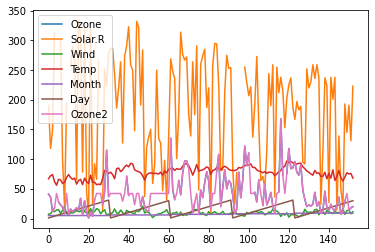

In [3]:
%matplotlib inline
df.plot()

<AxesSubplot:>

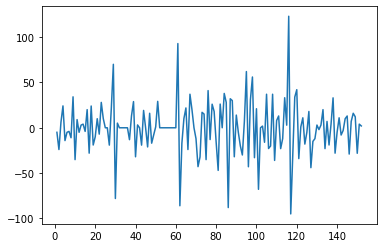

In [6]:
#1차분 차분 데이터
diff1 = df['Ozone2'].diff(periods=1).iloc[1:]
diff1.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1 = np.log(df['Ozone2']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-9.189875590807727, 2.1375829069820617e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.5529934990679)
ADF Statistic: -9.189876
p-value: 0.000000


In [9]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Ozone2'], suppress_warnings=True)
model

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [10]:
#학습용,검증용 구분
n = int(df.shape[0]*.8)
train =df[:n]
test = df[n:]
print(len(df['Ozone2']))
print(train['Ozone2'].values)
print(test['Ozone2'].values)

153
[ 41.          36.          12.          18.          42.12931034
  28.          23.          19.           8.          42.12931034
   7.          16.          11.          14.          18.
  14.          34.           6.          30.          11.
   1.          11.           4.          32.          42.12931034
  42.12931034  42.12931034  23.          45.         115.
  37.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  29.          42.12931034  71.
  39.          42.12931034  42.12931034  23.          42.12931034
  42.12931034  21.          37.          20.          12.
  13.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034 135.          49.          32.          42.12931034
  64.          40.          77.          97.          97.
  85.          42.12931034  10.          27.          42.12931034
   7.          48.          35.          61.          

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['Ozone2'], order=(1,0,1)).fit()

In [13]:
#예측값

fore = model.forecast(steps=5)
print(fore)

(array([68.4082478 , 61.06897284, 56.01405002, 52.53247387, 50.13453963]), array([26.39598996, 27.87511498, 28.54999086, 28.86461831, 29.01267688]), array([[ 1.66730581e+01,  1.20143437e+02],
       [ 6.43475141e+00,  1.15703194e+02],
       [ 5.70961794e-02,  1.11971004e+02],
       [-4.04113845e+00,  1.09106086e+02],
       [-6.72926215e+00,  1.06998341e+02]]))


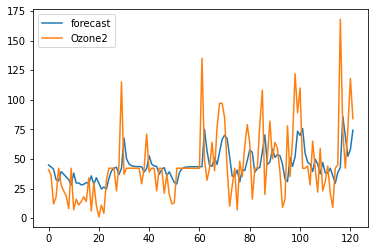

In [14]:
import matplotlib.pyplot as plt

#실제값과 예측값
model.plot_predict()
plt.show()

[85.         96.         78.         73.         91.         47.
 32.         20.         23.         21.         24.         44.
 21.         28.          9.         13.         46.         18.
 13.         24.         16.         13.         23.         36.
  7.         14.         30.         42.12931034 14.         18.
 20.        ]
[68.4082478  61.06897284 56.01405002 52.53247387 50.13453963 48.48296334
 47.34544081 46.56197259 46.02235916 45.65070062 45.39472094 45.21841504
 45.09698441 45.01334912 44.95574534 44.91607076 44.8887449  44.86992423
 44.85696151 44.84803343 44.84188422 44.83764896 44.83473192 44.83272281
 44.83133904 44.83038597 44.82972954 44.82927742 44.82896603 44.82875156
 44.82860384]


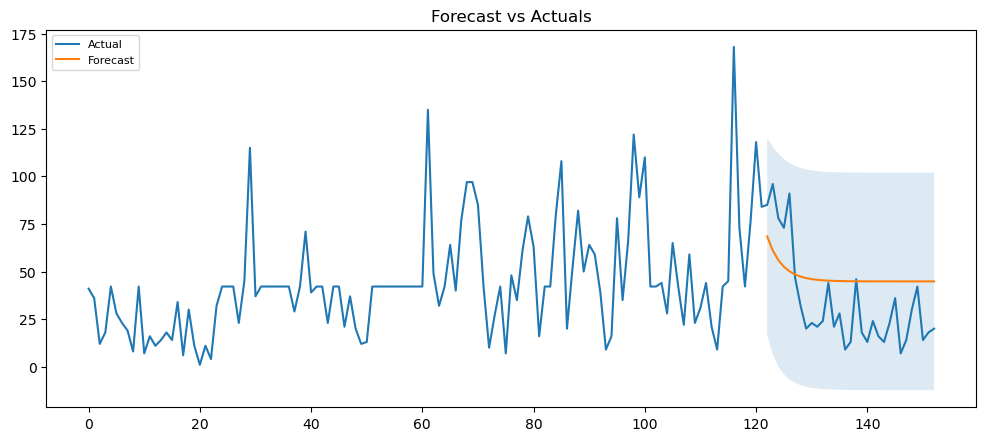

In [17]:
#예측값
fc, se, conf = model.forecast(steps=len(test))
print(test['Ozone2'].values)
print(fc)
fc_sereies = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Ozone2'], label='Actual')
plt.plot(fc_sereies, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()